In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
my_data = np.genfromtxt('data.csv', delimiter=',') # read the data
X = my_data[:, 0].reshape(-1,1) # -1 tells numpy to figure out the dimension by itself
ones = np.ones([X.shape[0], 1]) # create a array containing only ones 
X = np.concatenate([ones, X],1) # cocatenate the ones to X matrix
y = my_data[:, 1].reshape(-1,1) # create the y matrix

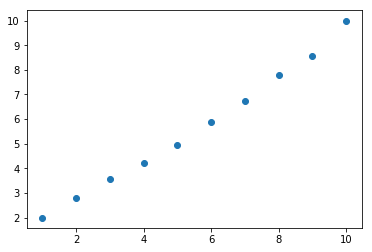

In [8]:
plt.scatter(my_data[:, 0].reshape(-1,1), y)

In [14]:
alpha = 0.0001
iters = 1000

# theta is a row vector
theta = np.array([[1.0, 1.0]])
#print(theta)

In [15]:
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication of arrays. If we want to use * for multiplication we will have to convert all array
    return np.sum(inner) / (2 * len(X))

In [16]:
def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        # if i % 10 == 0: # just look at cost every ten loops for debugging
        #     print(cost)
    return (theta, cost)

In [17]:
g, cost = gradientDescent(X, y, theta, alpha, iters)  
print(g, cost)

[[0.9776293  0.85479555]] 0.025003652220312256


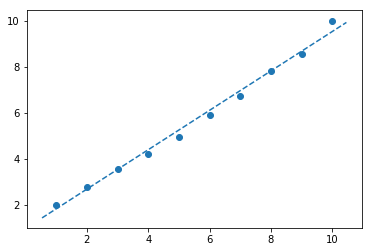

In [18]:
plt.scatter(my_data[:, 0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation
plt.plot(x_vals, y_vals, '--')